# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **Load the Data**

In [11]:

reviews_df = pd.read_csv('user_reviews.csv')
apps_df = pd.read_csv('/content/apps.csv')

print(reviews_df.head())
print(apps_df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                            

# **Data Exploration and Cleaning**

In [12]:

print(reviews_df.isnull().sum())
print(apps_df.isnull().sum())

reviews_df.dropna(inplace=True)
apps_df.dropna(inplace=True)

print(reviews_df.isnull().sum())
print(apps_df.isnull().sum())


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64
Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#  Merging the Dataset

In [15]:

merged_df = pd.merge(reviews_df, apps_df, on='App')
print(merged_df.head())

features_df = merged_df.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Rating': 'mean',
    'Reviews': 'sum',
    'Price': lambda x: x.str.replace('$', '').astype(float).mean()
}).reset_index()

print(features_df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You         Works great especially going grocery store   
3  10 Best Foods for You                                       Best idea us   
4  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Unnamed: 0  \
0  Positive                1.00                0.533333        1393   
1  Positive                0.25                0.288462        1393   
2  Positive                0.40                0.875000        1393   
3  Positive                1.00                0.300000        1393   
4  Positive                1.00                0.300000        1393   

             Category  Rating  Reviews  Size  Installs  Type Price  \
0  HEALTH_AND_FITNESS     4.

# **Clustering & Visualization**

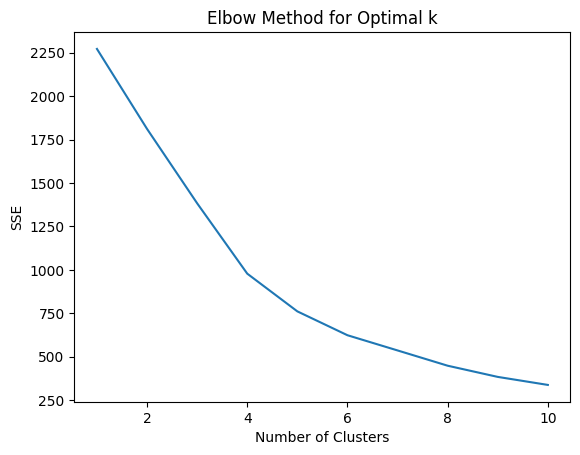

                               App  Sentiment_Polarity  \
0            10 Best Foods for You            0.470733   
1                             11st            0.185943   
2       1800 Contacts - Lens Store            0.318145   
3  1LINE – One Line with One Touch            0.196290   
4     21-Day Meditation Experience            0.258014   

   Sentiment_Subjectivity  Rating  Reviews  Price  Cluster  
0                0.495455     4.0   483060    0.0        1  
1                0.455340     3.8  1900548    0.0        0  
2                0.591098     4.7  1852800    0.0        1  
3                0.557315     4.6  8165364    0.0        1  
4                0.551048     4.4   920480    0.0        1  


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Sentiment_Polarity', 'Rating', 'Reviews', 'Price']])

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)
print(features_df.head())


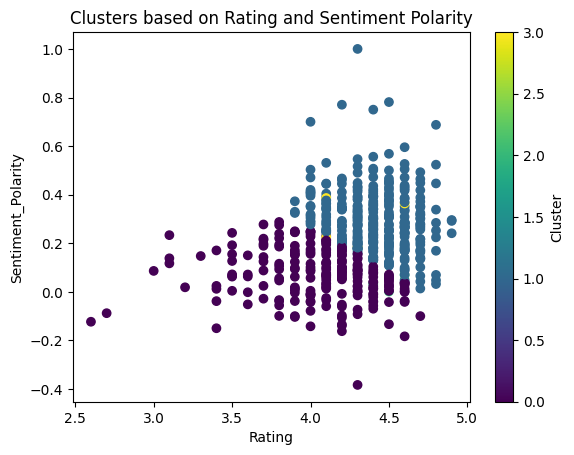

In [21]:

plt.scatter(features_df['Rating'], features_df['Sentiment_Polarity'], c=features_df['Cluster'], cmap='viridis')
plt.title('Clusters based on Rating and Sentiment Polarity')
plt.xlabel('Rating')
plt.ylabel('Sentiment_Polarity')
plt.colorbar(label='Cluster')
plt.show()


# **Insights and Recommendations**

In [22]:
for cluster in range(optimal_k):
    cluster_data = features_df[features_df['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe())



Cluster 0 Summary:
       Sentiment_Polarity  Sentiment_Subjectivity      Rating       Reviews  \
count          225.000000              225.000000  225.000000  2.250000e+02   
mean             0.068074                0.463828    4.060444  4.966324e+07   
std              0.102872                0.096039    0.355178  1.992849e+08   
min             -0.383333                0.000000    2.600000  1.580000e+02   
25%              0.004322                0.419542    3.900000  1.387540e+05   
50%              0.069002                0.477865    4.100000  7.647280e+05   
75%              0.147288                0.516120    4.300000  4.823680e+06   
max              0.287596                0.694105    4.700000  1.519701e+09   

            Price  Cluster  
count  225.000000    225.0  
mean     0.064311      0.0  
std      0.593979      0.0  
min      0.000000      0.0  
25%      0.000000      0.0  
50%      0.000000      0.0  
75%      0.000000      0.0  
max      6.990000      0.0  
Cluster 

# **Silhouette Analysis**

In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, features_df['Cluster'])
print(f'Silhouette Score: {score}')


Silhouette Score: 0.3456947103796255


# **Performing PCA for Visualization**

In [43]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
features_df['PCA1'] = pca_components[:, 0]
features_df['PCA2'] = pca_components[:, 1]

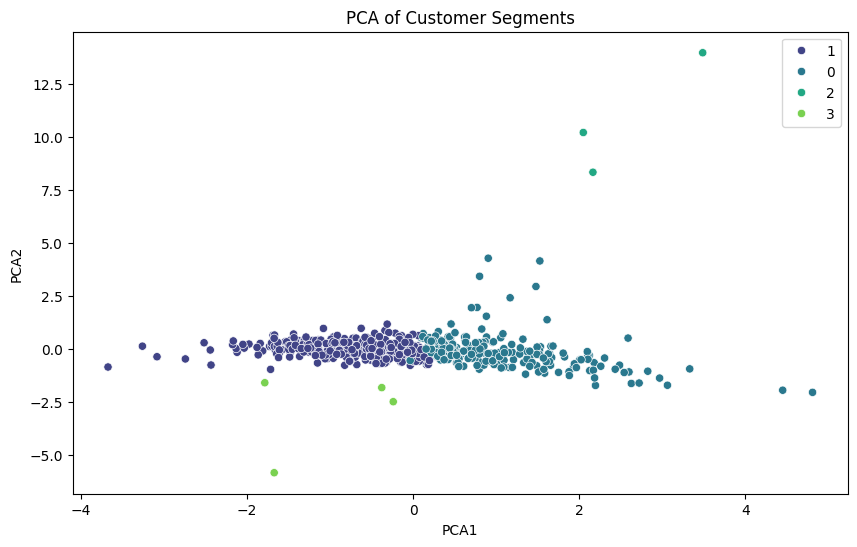

In [44]:
x_values = features_df['PCA1'].tolist()
y_values = features_df['PCA2'].tolist()
hue_values = features_df['Cluster'].astype(str).tolist()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_df['PCA1'], y=features_df['PCA2'], hue=hue_values, palette='viridis')
plt.title('PCA of Customer Segments')
plt.show()


# **Profile Each Segment**


In [36]:
for cluster in range(optimal_k):
    cluster_data = features_df[features_df['Cluster'] == cluster]
    print(f"Cluster {cluster} Profile:")
    print(f"Average Sentiment Polarity: {cluster_data['Sentiment_Polarity'].mean()}")
    print(f"Average Rating: {cluster_data['Rating'].mean()}")
    print(f"Total Reviews: {cluster_data['Reviews'].sum()}")
    print(f"Average Price: {cluster_data['Price'].mean()}")
    print("Top Apps in this Cluster:")
    print(cluster_data.nlargest(5, 'Reviews')[['App', 'Reviews']])
    print("\n")


Cluster 0 Profile:
Average Sentiment Polarity: 0.06807379811412467
Average Rating: 4.060444444444445
Total Reviews: 11174228059
Average Price: 0.06431111111111111
Top Apps in this Cluster:
                       App     Reviews
77     Angry Birds Classic  1519700637
250         Clash of Clans  1481426859
475       Garena Free Fire  1213368528
224  Candy Crush Soda Saga  1028961458
392       Farm Heroes Saga   837554300


Cluster 1 Profile:
Average Sentiment Polarity: 0.29618219052535444
Average Rating: 4.412797619047619
Total Reviews: 2822539423
Average Price: 0.014821428571428572
Top Apps in this Cluster:
                                                   App    Reviews
280                                        Crossy Road  385010626
206  Cache Cleaner-DU Speed Booster (booster & clea...  331751238
28         APUS Launcher - Theme, Wallpaper, Hide Apps  179286671
295  DU Recorder – Screen Recorder, Video Editor, Live  150146340
334                                            Dropbox  